In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit#
# scipy : optimiztion , interpolation , 미적분 , fft : matlab

In [10]:
x = np.array([0.0,1.0,2.0,3.0,4.0,5.0])
y = np.array([0.0,0.8,0.,0.1,-0.8,-1.0])
z = np.polyfit(x,y,3) # 계수를 찾는다 3차원으로 
print(z) #3차원 + 절편 
p = np.poly1d(z) # 방정식을 만들어줌
print("방정식",p)
p(0.5)
p(0.3)
p(10)
p(3.0)

[ 0.0537037  -0.49920635  0.94074074  0.06031746]
방정식         3          2
0.0537 x - 0.4992 x + 0.9407 x + 0.06032


-0.16031746031746194

-0.7269841269841287


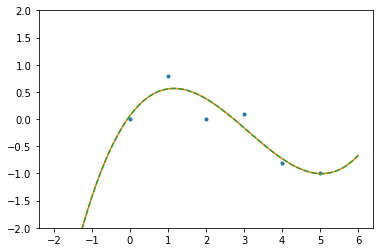

In [11]:
p30 = np.poly1d(np.polyfit(x,y,3)) # 방정식으로 변환 
print(p30(4)) # 방정식으로 구한 값을 리턴
xp = np.linspace(-2,6,100)  # 100등분한 수 
_ = plt.plot(x,y,'.',xp,p(xp),'-',xp,p30(xp), '--')
plt.ylim(-2,2)
plt.show()

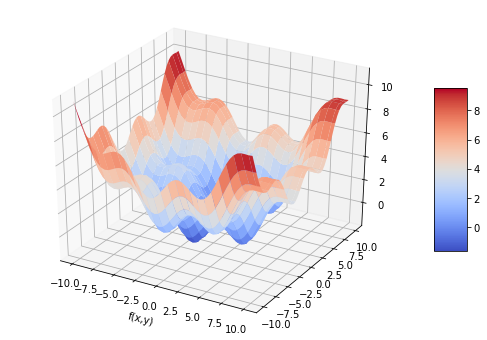

In [12]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
def fm(p):
    x , y = p
    return (np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2)

x = np.linspace(-10,10,50)
y = np.linspace(-10,10,50)

X, Y =np.meshgrid(x,y)
Z =fm((X, Y))
#blackbox : 일반이론
fig = plt.figure(figsize = (9,6))
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(X , Y, Z , rstride = 2, cstride = 2,
                      cmap = mpl.cm.coolwarm,
                      linewidth = 0.5 , antialiased =True)
ax.set_xlabel('x')
ax.set_xlabel('y')
ax.set_xlabel('f(x,y)')
fig.colorbar(surf, shrink = 0.5, aspect= 5)
# GD : gradinent descent : 경사하강법 => ANN (Artificial neural network)
# 지역해 문제 -> momentum 
# fitting 시간 문제 : 학습율 문제 : 처음은 많이 점점 작게
# adam optimizer
# ann의 최적화 찾기

In [13]:
# 무작위 대입법 
import scipy.optimize as spo
def fo(p):
    x , y =p
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y **2
    if output == True:
        print('%8.4f %8.4f %8.4f'% (x,y,z))
    return z
output = True 
opt1 = spo.brute(fo,((-10,10.1,5),(-10,10.1,5)),
                finish = None)
print(opt1)

-10.0000 -10.0000  11.0880
-10.0000  -5.0000   7.7529
-10.0000   0.0000   5.5440
-10.0000   5.0000   5.8351
-10.0000  10.0000  10.0000
 -5.0000 -10.0000   7.7529
 -5.0000  -5.0000   4.4178
 -5.0000   0.0000   2.2089
 -5.0000   5.0000   2.5000
 -5.0000  10.0000   6.6649
  0.0000 -10.0000   5.5440
  0.0000  -5.0000   2.2089
  0.0000   0.0000   0.0000
  0.0000   5.0000   0.2911
  0.0000  10.0000   4.4560
  5.0000 -10.0000   5.8351
  5.0000  -5.0000   2.5000
  5.0000   0.0000   0.2911
  5.0000   5.0000   0.5822
  5.0000  10.0000   4.7471
 10.0000 -10.0000  10.0000
 10.0000  -5.0000   6.6649
 10.0000   0.0000   4.4560
 10.0000   5.0000   4.7471
 10.0000  10.0000   8.9120
[0. 0.]


In [14]:
# 무작위 대입법 
import scipy.optimize as spo
def fo(p):
    x , y =p
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y **2
    if output == True:
        print('%8.4f %8.4f %8.4f'% (x,y,z))
    return z
output = True 
opt1 = spo.brute(fo,((-10,10.1,5),(-10,10.1,5)),
                finish = None)
output = False
opt1 = spo.brute(fo,((-10,10.1,0.1),(-10,10.1,0.1)),
                finish = None)
#ann 으로 최적해를 찾는다 , 행렬곱을 이용 
print(opt1)

-10.0000 -10.0000  11.0880
-10.0000  -5.0000   7.7529
-10.0000   0.0000   5.5440
-10.0000   5.0000   5.8351
-10.0000  10.0000  10.0000
 -5.0000 -10.0000   7.7529
 -5.0000  -5.0000   4.4178
 -5.0000   0.0000   2.2089
 -5.0000   5.0000   2.5000
 -5.0000  10.0000   6.6649
  0.0000 -10.0000   5.5440
  0.0000  -5.0000   2.2089
  0.0000   0.0000   0.0000
  0.0000   5.0000   0.2911
  0.0000  10.0000   4.4560
  5.0000 -10.0000   5.8351
  5.0000  -5.0000   2.5000
  5.0000   0.0000   0.2911
  5.0000   5.0000   0.5822
  5.0000  10.0000   4.7471
 10.0000 -10.0000  10.0000
 10.0000  -5.0000   6.6649
 10.0000   0.0000   4.4560
 10.0000   5.0000   4.7471
 10.0000  10.0000   8.9120
[-1.4 -1.4]


In [16]:
output = True
opt2 = spo.fmin(fo, opt1, xtol =0.001, ftol = 0.001, maxiter =15,
               maxfun = 20)
opt2
fm(opt2)
output = False
spo.fmin(fo, (2.0,2.0), maxiter = 250) # 할강단체법 

 -1.4000  -1.4000  -1.7749
 -1.4700  -1.4000  -1.7743
 -1.4000  -1.4700  -1.7743
 -1.3300  -1.4700  -1.7696
 -1.4350  -1.4175  -1.7756
 -1.4350  -1.3475  -1.7722
 -1.4088  -1.4394  -1.7755
 -1.4438  -1.4569  -1.7751
 -1.4328  -1.4427  -1.7756
 -1.4591  -1.4208  -1.7752
 -1.4213  -1.4347  -1.7757
 -1.4235  -1.4096  -1.7755
 -1.4305  -1.4344  -1.7757
 -1.4168  -1.4516  -1.7753
 -1.4305  -1.4260  -1.7757
 -1.4396  -1.4257  -1.7756
 -1.4259  -1.4325  -1.7757
 -1.4259  -1.4241  -1.7757
 -1.4304  -1.4177  -1.7757
 -1.4270  -1.4288  -1.7757
Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([4.2710728 , 4.27106945])

In [17]:
#선형회귀(linear regression) : 기울기와 절편
-전제조건 (통계학)
    - 선형성 : 비선형성 => scikits 에서는 ploynomial + LR 로 해결 
        -비선형 : 과적합
    - 정규성 : 오차가 정규분포를 띈다, 
    - 독립성 : 변수간 다중공선성, 자귀회귀
        - scikits : lasso(절대값 규제) , Ridge(제곱) ,ElsticNet
        - regulization은 에러가 이미 존재한다고 보고 회귀
    - 등분산성 : 이산성 고려한 모델 사용

IndentationError: unexpected indent (<ipython-input-17-501cae05b9d9>, line 3)

In [18]:
from sklearn.datasets import make_regression
import statsmodels.api as sm
bias = 100
# 절편
# 속성
# 계수
X0, y ,w =make_regression(
    n_samples = 200 , n_features=1, bias = bias , noise = 10, coef =True,
    random_state = 1
)
print(X0[:5,:])
# 선형회귀시 범주형은 상수등록 statsmodels  에서 회귀 분석시
# 상수별로 회귀분석을 실행함 
X = sm.add_constant(X0) # 상수를 고려한 (절편을 고려)
print(X[:5,:])
y = y.reshape(len(y),1)
w

[[ 0.23249456]
 [-0.03869551]
 [ 0.5505375 ]
 [ 0.50318481]
 [ 2.18697965]]
[[ 1.          0.23249456]
 [ 1.         -0.03869551]
 [ 1.          0.5505375 ]
 [ 1.          0.50318481]
 [ 1.          2.18697965]]


array(86.44794301)

In [19]:
import numpy as np
# 행렬곱 연산자 = > ann 
w = np.linalg.inv(X.T @ X) @ X.T @ y # 역행렬
w

array([[99.79150869],
       [86.96171201]])

In [20]:
import statsmodels.api as sm 
# ordinary least square : 회귀모델
# y = a ^ x + b
model = sm.OLS(y,X) # statsmodels 에서 ordinary least square를 이용한
                    # 선형회귀 

result = model.fit()
print(result.summary())
# r-square 결정계수 : 회귀제곱합/총오차제곱
# F value : 분산비
# ols 가장 기본적인 결정론적 선형 회귀 방법
# 잔체제곱합를 최소화하는 가중치 벡터를 행렬 미분으로 구하는 방법
# 최소자승법(ols or 최소제곱법 )
#cond 다중공선성을 보는거
w

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Mon, 13 Jan 2020   Prob (F-statistic):          8.17e-182
Time:                        15:03:55   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.7915      0.705    141.592      0.0

array([[99.79150869],
       [86.96171201]])

In [21]:
#최소제곱법
y = 86.96171201 * x + 99.79150869

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston() #보스턴 집값에 대한 예측
model_boston = LinearRegression().fit(boston.data, boston.target)
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns = ["MEDV"])
dfX.head()
dfy # 평균값으로 집값 예측 

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [23]:
#속성의 열이름 
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [24]:
# 변수가 13개 => 계수
# 독립변수 => 종속변수
# fit : 개수 (parameter)
model_boston = LinearRegression().fit(boston.data,boston.target)

In [25]:
# 결과 속성
model_boston.coef_ #coefficient 계수
model_boston.intercept_

36.459488385089855

In [27]:
predictions = model_boston.predict(boston.data)

In [28]:
predictions - boston.target

array([ 6.00384338e+00,  3.42556238e+00, -4.13240328e+00, -4.79296351e+00,
       -8.25647577e+00, -3.44371554e+00,  1.01808268e-01, -7.56401157e+00,
       -4.97636315e+00,  2.02621071e-02,  3.99949651e+00,  2.68679568e+00,
       -7.93478472e-01, -8.47097189e-01,  1.08348205e+00, -6.02516792e-01,
       -2.57249021e+00, -5.88598653e-01, -4.02198894e+00,  2.06136033e-01,
       -1.07614247e+00, -1.92896331e+00,  6.32881292e-01, -6.93714654e-01,
        7.83383155e-02, -5.13314391e-01, -1.13602345e+00, -9.15257194e-02,
        1.14737285e+00, -1.23571798e-01, -1.24488241e+00,  3.55923295e+00,
       -4.38894264e+00,  1.18275814e+00,  2.06758913e-01,  4.91463526e+00,
        2.34193708e+00,  2.10891142e+00, -1.78497388e+00,  5.57625688e-01,
       -6.84897746e-01,  1.42056414e+00, -9.61337195e-02, -9.02072745e-02,
        1.74149176e+00,  2.79669817e+00,  4.23200323e-01,  1.43655088e+00,
       -5.29344623e+00, -2.19392249e+00,  1.58152535e+00,  3.47222285e+00,
        2.65585080e+00,  

In [29]:
x = np.array([0.0,1.0,2.0,3.0,4.0,5.0])
y = np.array([0.0,0.8,0.,0.1,-0.8,-1.0])
z = np.polyfit(x,y,3)
z

array([ 0.0537037 , -0.49920635,  0.94074074,  0.06031746])

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [31]:
X =[[0.44,0.68],[0.99,0.23]]
y =[109.85,155.72]
X_test = [[0.49,0.18]]

In [32]:
# 비선형회귀 = 다차방정식으로 변환 + LR -> 비선형 회귀
# 데이터가 2차 => 포물선 형태 
# 다차 방정식의 특성을 추가 
poly =PolynomialFeatures(degree = 2)
#scikits 에는 estimator (parameter 추정기(기울기, 절편),)predict(예측)
X_ = poly.fit_transform(X) # trasformer = fit + transform
X_test_ = poly.fit_transform(X_test)

In [33]:
lg = LinearRegression() #선형회귀
lg.fit(X_,y)
lg.coef_ # 다차방정식 계수

array([  0.        ,  19.4606578 , -15.92235638,  27.82874066,
        -2.52988551, -14.48934431])

In [34]:
lg.predict(X_test_) # 비선형 예측

array([126.84247142])

In [35]:
#로지스틱 회귀분석 
#logistic function => 0~1사이 값으로 출력
#회귀분석 = > mapping 
- 분석 => 결과값을 logic function값으로 매핑
    - 0.5를 기준 : 이진
    - 발전 : 2개 이상의 종속변수인 경우 softmax 
- 연속된 독립변수들의 입력 = > 이산적 결과 판정 
# regression : 연속된 수치 => 결과도 연속된 수치 

SyntaxError: invalid syntax (<ipython-input-35-8d6f293a23ad>, line 4)

C:\Users\ICT01_20\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\ICT01_20\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ICT01_20\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Users\ICT01_20\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_20\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_20\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_20\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


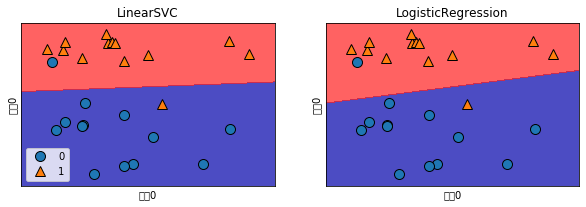

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
X , y =mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2,figsize =(10,3))
# axes 도화지
# suppirt vector classifier ,서포트 벡터로 생성된 분류기
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)  # 계수 
    mglearn.plots.plot_2d_separator(clf, X , fill= True, eps = 0.5,
                                   ax = ax , alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1], y, ax= ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성0")
axes[0].legend() #범례 

In [40]:
#select : model_select , 변수 선택  feature extraction 
from sklearn.datasets import load_breast_cancer # 유방암정보 (2차원 )
from sklearn.model_selection import train_test_split
cancer =load_breast_cancer() # data, target(종속변수)
# 0.75, ,0.25
# 행열 - 열이름 : 변수이름
print(cancer.feature_names)
print(cancer.data.shape)
data = pd.DataFrame(cancer.data)
print(data.head())

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
#stratify 층화시켜라 
#random_state == seed 
logreg = LogisticRegression().fit(X_train, y_train)
# score : 정분류율 tp tn tf fn 
# tp + fn / tp +tn+ tf +fn -> 정분류율
# 오분류율 :fp + tn / tp +tn+ tf +fn
# 정밀도 : tp/ tp + fP
# 민감도 : tp/ tp+ tn 
# 특이도  : fn  /fp + fn
print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
#과대적합
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test, y_test)))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569, 30)
      0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.1

C:\Users\ICT01_20\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
#모델 선택

In [43]:
import numpy as np
from sklearn.model_selection import GroupKFold
#model_selection 모델 데이터를 구분
X = np.array([[1,2],[3,4],[5,6],[7,8]]) #4 x 2 
y = np.array([1,2,3,4])# 종속변수
groups = np.array([0,0,2,2])# 그룹 구분 
group_kfold =GroupKFold(n_splits=2)
group_kfold.get_n_splits(X,y,groups)
print(group_kfold)
for train_index , test_index in group_kfold.split(X,y,groups):
    print("TRAIN", train_index, "Test:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train, X_test, y_train, y_test)

GroupKFold(n_splits=2)
TRAIN [0 1] Test: [2 3]
[[1 2]
 [3 4]] [[5 6]
 [7 8]] [1 2] [3 4]
TRAIN [2 3] Test: [0 1]
[[5 6]
 [7 8]] [[1 2]
 [3 4]] [3 4] [1 2]


In [46]:
#feature_selection
from sklearn.datasets import make_friedman1 #데이터 생성
from sklearn.feature_selection import RFE #recursive feature elimination
#재귀적으로 특징 제거
from sklearn.svm import SVR 
# 열변수 10 
# 관측치 50
X ,y = make_friedman1(n_samples = 50 , n_features =10 , random_state =0)
estimator =SVR(kernel = "linear") # 선형회귀
# regression :예측 -svc : clasification:분류 
selector = RFE(estimator , 5, step = 1) # 변수를 5개만 남기겠다
#step = 한번에 하나씩 제거 
#변수를 제거하는 이유 : 잡음제거 (노이즈)
selector = selector.fit(X,y)
selector.support_
selector.ranking_

array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])

In [50]:
#text mining => vectorizing 
# problem of evil queen horizon 
sample = ['problem of evil', # 중복되지 않는 단어
         'evil queen',
         'horizon problem']

In [55]:
#특징 추출
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
print(type(X))
#배열
pd.DataFrame(X.toarray(), columns =vec.get_feature_names())

<class 'scipy.sparse.csr.csr_matrix'>


,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer() 
# term frequency(단어빈도) + inverse document frequency(역문서 빈도)
# 단어수 / 전체문서  => 전체문서/단어수 
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


In [62]:
#분류
#예측

In [66]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = [0,2,1,3]
y_true = [0,1,2,3]
accuracy_score(y_true,y_pred)
accuracy_score(y_true,y_pred,normalize= False)
#정확도 

2

In [74]:
#svc
#cross validation : 5 데이터를 5덩이로 나누어라 4개는 train 1개는 test
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
iris = datasets.load_iris()
X, y= iris.data, iris.target
clf = svm.SVC(gamma= 'scale', random_state=0) #모델을 가르키는 이름 
cross_val_score(clf, X,y,scoring ='recall_macro', cv= 5)
# support vector comvex hall
# 커널의 모양 통제 gamma 
#recall  민감도
#5개로 나눴으니깐 결과도 5개
# 찾아보기 comvex hall - 고차원 
# kernel 
#svc : rbf 방사형 커널,  poly ,sigmoid(0~1)

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [76]:
#척도
from sklearn.metrics import confusion_matrix
y_true =[2,0,2,2,0,1]
y_pred =[0,0,2,2,0,2]
confusion_matrix(y_true,y_pred) #혼동 행렬
    #0,1,2
# 0 2  0 0   
# 1 0  0 1
# 2 1  0 2

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [82]:
import numpy as np
import sklearn.metrics as metrics
y = np.array([1,1,1,1,0,0]) # 실제값 
p = np.array([1,1,0,0,0,0]) # 예측값 
accuracy = np.mean(np.equal(y,p)) # 정확도 
right = np.sum(y * p == 1) # 1로 같은 것 
precision = right / np.sum(p) # 정밀도 =  Tp / Tp + FP
recall = right / np.sum(y) # 민감도 tp / tp + tn
f1 = 2 * precision * recall / (precision + recall) 
# 종속변수의 실제값과 예측값
print('accuracy' , metrics.accuracy_score(y,p)) 
print('precision' , metrics.precision_score(y,p)) 
print('recall' , metrics.recall_score(y,p)) 
print('f1' , metrics.f1_score(y,p))
print(metrics.classification_report(y,p))
print(metrics.confusion_matrix(y,p))

accuracy 0.6666666666666666
precision 1.0
recall 0.5
f1 0.6666666666666666
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6

[[2 0]
 [2 2]]


In [113]:
# 문제 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X ,y = make_classification(n_samples = 16, n_features=2,
                          n_informative =2 , n_redundant= 0,
                           random_state=0)
print(X[:5,:]) # 16 x 2
print(X.shape)
model = LogisticRegression()
model.fit(X,y) # 계수 완성 
y_hat = model.predict(X)
# 정밀도(precision)
print("정밀도",metrics.precision_score(y,y_hat))
print('민감도',metrics.recall_score(y,y_hat))
print('f1_score' ,metrics.f1_score(y,y_hat))
print(metrics.classification_report(y,y_hat))
print(metrics.confusion_matrix(y,y_hat, labels=[1,0]))
# 1) LogisticRegression 실시
# 2) 훈련데이터 예측
# 3) 결과를 평가하시요 (precision , recall ,f1_score)

[[ 2.03418291 -0.38437236]
 [ 4.06377686  0.17863836]
 [ 0.41966783 -1.38206096]
 [-1.27225991  0.6600493 ]
 [-0.81664689  1.16942291]]
(16, 2)
정밀도 0.8571428571428571
민감도 0.75
f1_score 0.7999999999999999
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.86      0.75      0.80         8

    accuracy                           0.81        16
   macro avg       0.82      0.81      0.81        16
weighted avg       0.82      0.81      0.81        16

[[6 2]
 [1 7]]


C:\Users\ICT01_20\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Users\ICT01_20\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Users\ICT01_20\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_20\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_20\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_20\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


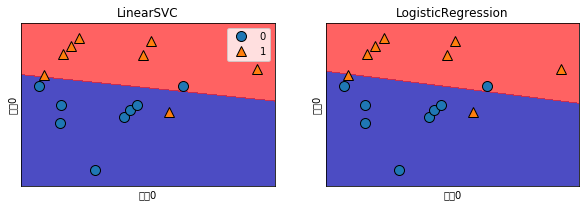

In [91]:
X ,y = make_classification(n_samples = 16, n_features=2,
                          n_informative =2 , n_redundant= 0,
                           random_state=0)
fig, axes = plt.subplots(1,2,figsize =(10,3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)  # 계수 
    mglearn.plots.plot_2d_separator(clf, X , fill= True, eps = 0.5,
                                   ax = ax , alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1], y, ax= ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성0")
axes[0].legend() #범례 

In [103]:
clf = svm.SVC(gamma= 'scale', random_state=0) #모델을 가르키는 이름 
cross_val_score(clf, X,y,scoring ='recall_macro', cv= 5)

array([0.75, 1.  , 0.5 , 1.  , 1.  ])

In [99]:
print('accuracy' , metrics.accuracy_score(y,p)) 
print('precision' , metrics.precision_score(y,p)) 
print('recall' , metrics.recall_score(y,p)) 
print('f1' , metrics.f1_score(y,p))
print(metrics.classification_report(y,p))
print(metrics.confusion_matrix(y,p))

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets